<a href="https://colab.research.google.com/github/shahchayan9/Dimensionality-Reduction/blob/main/dimensionality_reduction_techniques_on_tabular_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dimensionality Reduction Techniques on Tabular Dataset**

In [ ]:
# Install required libraries
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
from sklearn.manifold import TSNE, Isomap, MDS, LocallyLinearEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from umap import UMAP
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [ ]:
# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target
target_names = data.target_names

# Standardize the dataset
X = StandardScaler().fit_transform(X)

In [ ]:
# Function to visualize the embeddings
def plot_embedding(X_embedded, title):
    plt.figure(figsize=(8, 6))
    for color, i, target_name in zip(['navy', 'turquoise', 'darkorange'], [0, 1, 2], target_names):
        plt.scatter(X_embedded[y == i, 0], X_embedded[y == i, 1], alpha=0.8, color=color, label=target_name)
    plt.legend(loc='best')
    plt.title(title)
    plt.show()

### **1. Linear Discriminant Analysis (LDA)**
LDA projects data by maximizing class separability in the reduced dimensions.

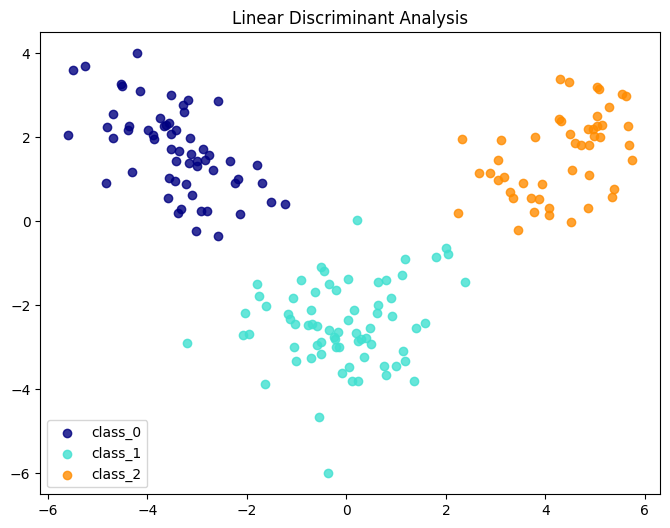

In [ ]:
# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)
plot_embedding(X_lda, 'Linear Discriminant Analysis')

### **2. t-Distributed Stochastic Neighbor Embedding (t-SNE)**
t-SNE is excellent for visualizing high-dimensional data by preserving local relationships.

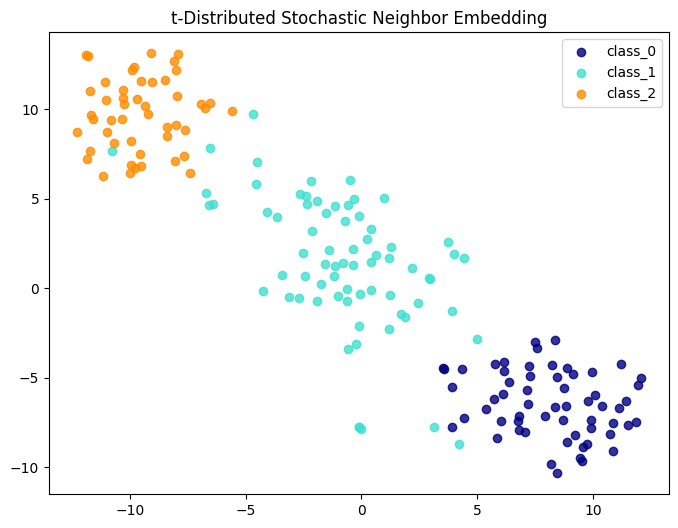

In [ ]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, 't-Distributed Stochastic Neighbor Embedding')

### **3. Isometric Mapping (Isomap)**
Isomap preserves geodesic distances while reducing dimensions.

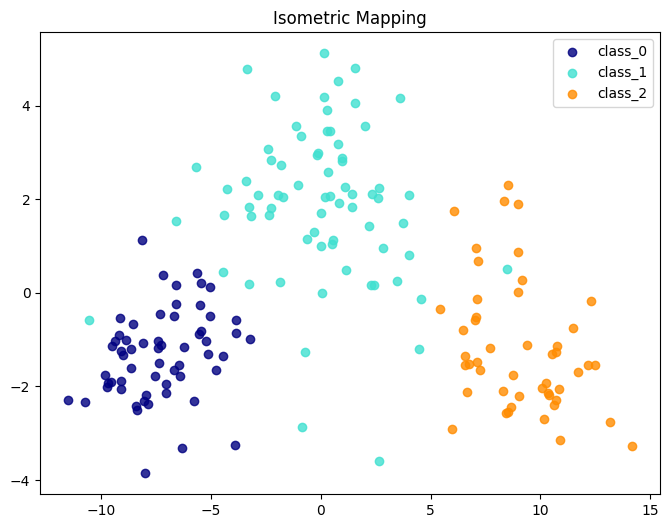

In [ ]:
# Apply Isomap
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)
plot_embedding(X_isomap, 'Isometric Mapping')

### **4. Uniform Manifold Approximation and Projection (UMAP)**
UMAP is known for its speed and ability to preserve local and global structures.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


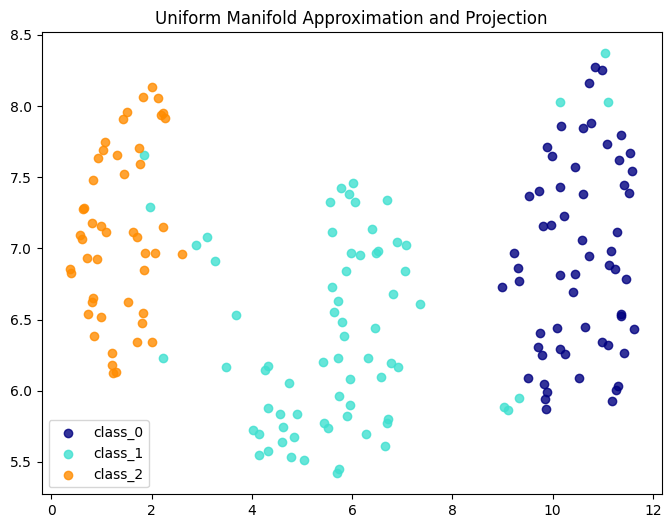

In [ ]:
# Apply UMAP
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X)
plot_embedding(X_umap, 'Uniform Manifold Approximation and Projection')

### **5. Multidimensional Scaling (MDS)**
MDS reduces dimensions by preserving pairwise distances.

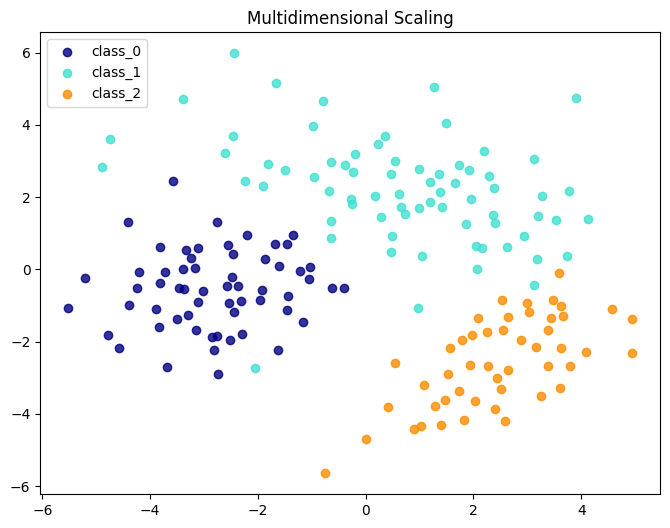

In [ ]:
# Apply MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)
plot_embedding(X_mds, 'Multidimensional Scaling')

### **6. Randomized PCA**
Randomized PCA provides a computationally efficient version of PCA.

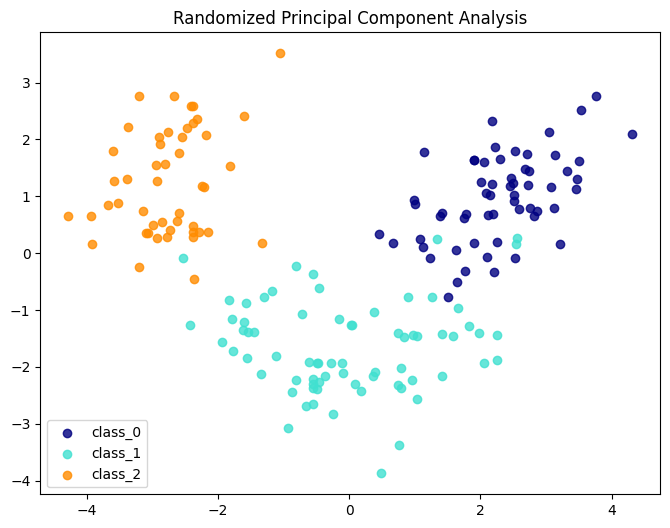

In [ ]:
# Apply Randomized PCA
randomized_pca = PCA(n_components=2, svd_solver='randomized', random_state=42)
X_randomized_pca = randomized_pca.fit_transform(X)
plot_embedding(X_randomized_pca, 'Randomized Principal Component Analysis')

### **7. Kernel PCA**
Kernel PCA introduces non-linearity by using kernel functions.

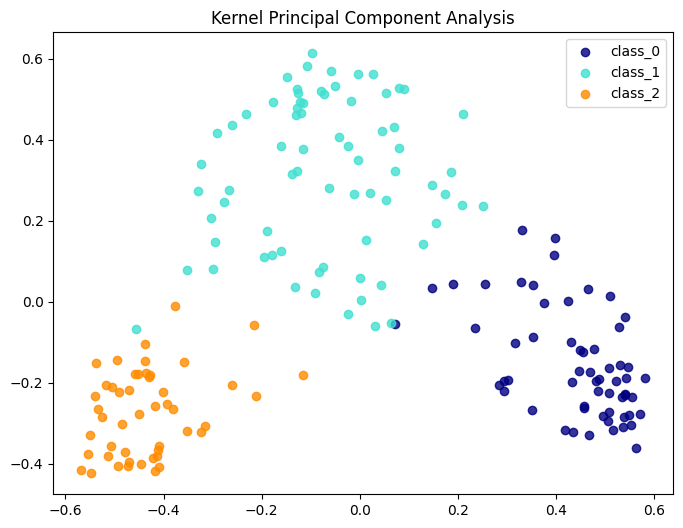

In [ ]:
# Apply Kernel PCA
kernel_pca = KernelPCA(n_components=2, kernel='rbf', random_state=42)
X_kernel_pca = kernel_pca.fit_transform(X)
plot_embedding(X_kernel_pca, 'Kernel Principal Component Analysis')

### **8. Incremental PCA**
Incremental PCA processes data in batches, useful for large datasets.

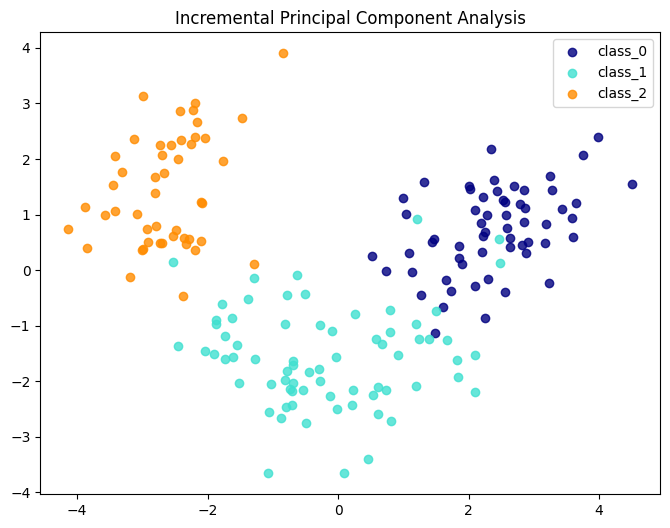

In [ ]:
# Apply Incremental PCA
incremental_pca = IncrementalPCA(n_components=2)
X_incremental_pca = incremental_pca.fit_transform(X)
plot_embedding(X_incremental_pca, 'Incremental Principal Component Analysis')

### **9. Factor Analysis**
Factor Analysis models the covariance structure of the data.

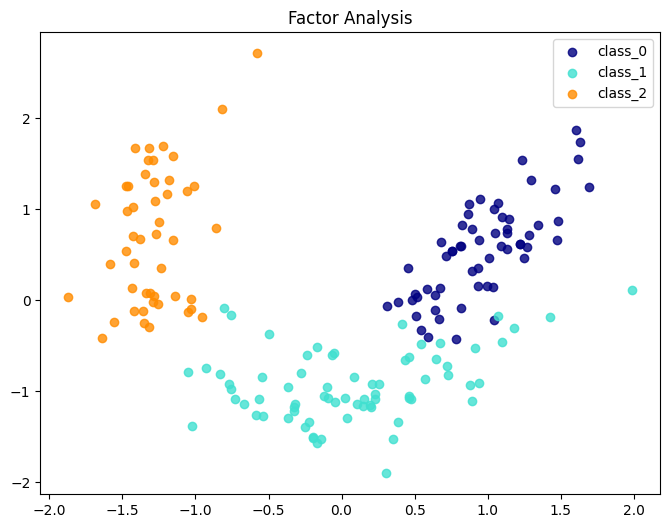

In [ ]:
# Apply Factor Analysis
factor_analysis = FactorAnalysis(n_components=2, random_state=42)
X_factor_analysis = factor_analysis.fit_transform(X)
plot_embedding(X_factor_analysis, 'Factor Analysis')

### **10. Autoencoders**
Autoencoders are neural networks that learn compressed representations.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


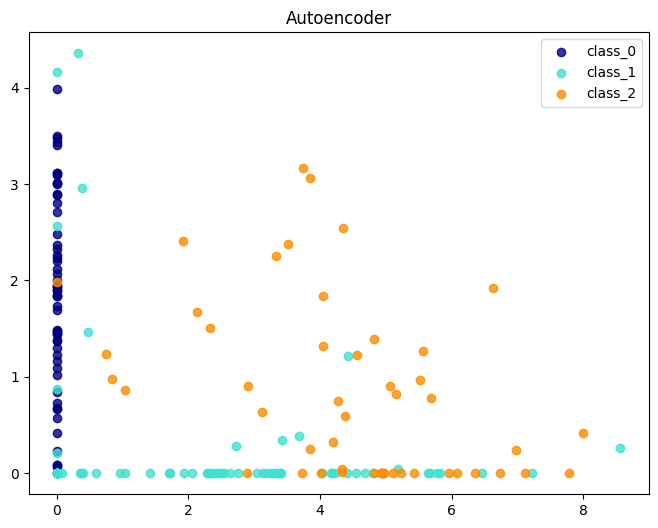

In [ ]:
# Define autoencoder architecture
input_dim = X.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder
autoencoder.fit(X, X, epochs=50, batch_size=16, shuffle=True, verbose=0)

# Extract encoder's output
encoder_model = Model(inputs=input_layer, outputs=encoder)
X_autoencoder = encoder_model.predict(X)
plot_embedding(X_autoencoder, 'Autoencoder')

## Observations and Insights

### Summary:
- **LDA** effectively separates classes due to its supervised nature.
- **t-SNE** and **UMAP** are better at preserving local structures.
- PCA-based methods are computationally efficient for linearly separable data.
- Autoencoders provide flexible, non-linear transformations.